# Import Libraries Needed

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv("test.csv")

In [3]:
df_train = pd.read_csv("train.csv")

# We need to predict the sales price

In [5]:
# check if the sales price is not in test set
# initialize then the Sale price with 0
if "SalePrice" not in df_test.columns:
    df_test['SalePrice'] = 0



In [6]:
# Concatenate the sets to perform data manipulation and EDA
df_all = pd.concat([df_train,df_test ], axis = 0)

# The index of all the dataset will be the Id columns as requested in the submission file
df_all = df_all.set_index('Id')

In [4]:
# data inspection
df_all.head()

## Find all the null value columns 

In [8]:
# put all the null values in a new data frame
# from stack overflow
# we are setting a condition if there is at least one nan value present in the dataframe 
# condition => df_all.isnull().sum()>0 show all the columns according to this condition
df_null = df_all[df_all.isnull().sum()[df_all.isnull().sum()>0].index]

In [5]:
# Data inspection
df_null.head()

#### 34 columns have null values in some rows

In [13]:
null_percentage = (df_null.isnull().sum() / len(df_null)) * 100
sorted_null_percentage = null_percentage.sort_values(ascending=False)

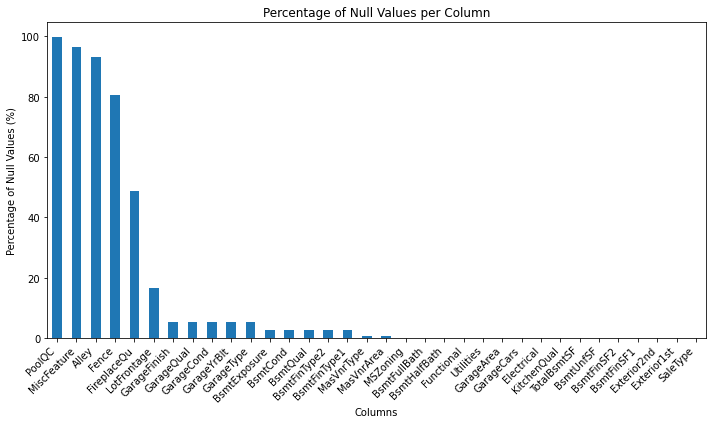

In [14]:
# Plotting the bar chart for null value percentages
plt.figure(figsize=(10, 6))
sorted_null_percentage.plot(kind='bar')
plt.title("Percentage of Null Values per Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# here we want all the columns that have string values or other values that are not numeric, so they have categorical data 
df_objects = df_all[df_all.select_dtypes(include=['object']).columns]

In [16]:
# Drop the columns that have categorical value and have more than 1100 nan values becuase they will not help during modeling
df_all = df_all.drop(df_all[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [17]:
# we do the same thing to the secondary data frame
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [18]:
df_objects = df_objects.fillna("null")

In [21]:
# Hot encoding to the dataset to fit into a model 
df_objects_encoded = pd.get_dummies(df_objects)

In [29]:
# drop all the null rows
for col in df_objects_encoded.columns:
    if 'null' in col:
        df_objects_encoded = df_objects_encoded.drop(col, axis=1)
        print(f"Dropped column: {col}")

Dropped column: MSZoning_null
Dropped column: Utilities_null
Dropped column: Exterior1st_null
Dropped column: Exterior2nd_null
Dropped column: MasVnrType_null
Dropped column: BsmtQual_null
Dropped column: BsmtCond_null
Dropped column: BsmtExposure_null
Dropped column: BsmtFinType1_null
Dropped column: BsmtFinType2_null
Dropped column: Electrical_null
Dropped column: KitchenQual_null
Dropped column: Functional_null
Dropped column: GarageType_null
Dropped column: GarageFinish_null
Dropped column: GarageQual_null
Dropped column: GarageCond_null
Dropped column: SaleType_null


In [30]:
# concatenate the df_all with the df_encoded
new_df = pd.concat([df_all, df_objects_encoded], axis = 1)

In [32]:
# I want the columns that are not objects i need numeric data to feed it into the model
new_df = new_df.drop(df_all.select_dtypes(include=['object']), axis = 1)

In [33]:
# check if there is any nan values
new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [34]:
# For all the columns in the mode column i will fillna with their mode 
# For all the colums in the mean column I will fill them with their mean
# Patent to MaizeCobra github

Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0] 

Series([], dtype: int64)

In [35]:
# Splitting data
training_df = new_df[0:len(df_train)]
testing_df = new_df[len(df_test):]

In [36]:
# We have to drop from the test data the salePrice since it is the targets column
testing_df = testing_df.drop(columns='SalePrice')

In [42]:
# Importing the libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Split data
X = training_df.drop(columns='SalePrice')
y = training_df['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [45]:
# Convert to numpy array before reshaping
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

In [46]:
X_train.shape, Y_train.shape

((1168, 270), (1168, 1))

In [6]:
# Model Linear Regression
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

NameError: name 'LinearRegression' is not defined

In [48]:
# Second model for better prediction results
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

4817.659723464757

In [49]:
# third model
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

152745071.37176797

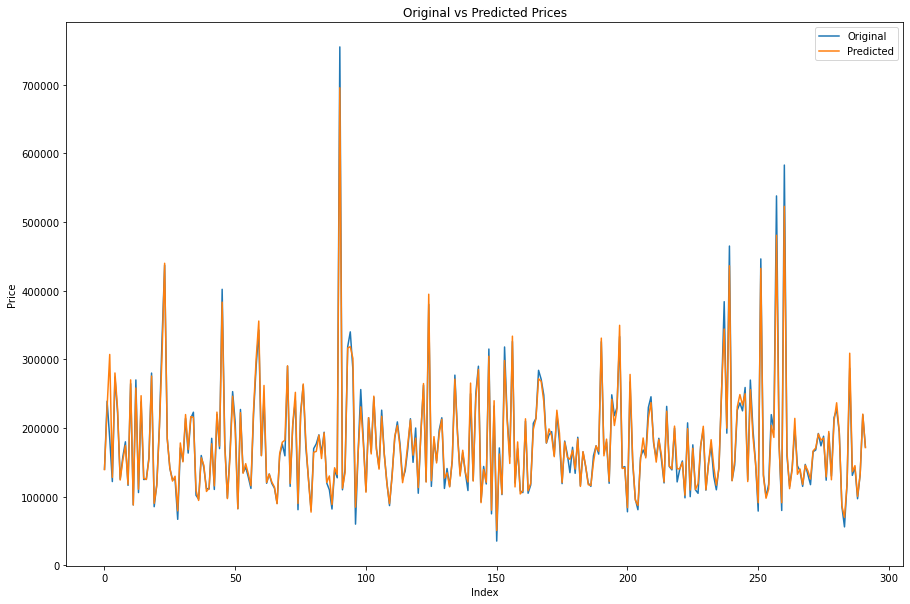

In [52]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(15, 10))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [54]:
pred = model_2.predict(testing_df)

final = pd.DataFrame()
final['Id'] = testing_df.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)